# 현대제철과 함께하는 데이터 분석

## 공장 내 철강 제품의 결로 발생 예측 모형 개발
- 데이터분석	▶ 데이터 이해와 분석 능력, 정확도와 활용성을 중심으로 평가
- 평가항목  데이터 및 문제 이해도(10)	분석능력(40)	활용성(50)
- 24, 48시간 후 결로발생 예측, 예측경보시스템 운영 방안 제시

## 컬럼 설명
- plant1_train.mea_ddhr	: (Char) 데이터 측정 일자 및 시간
- plant1_train.tem_in_loc*	: (NUM) 공장 내부 *번 위치 대기온도 측정값. 단위 ℃
- plant1_train.hum_in_loc*	: (NUM) 공장 내부 *번 위치 대기 상대습도 측정값. 단위 RH%
- plant1_train.tem_coil_loc* : (NUM) 공장 내부 *번 위치 철강제품(코일) 표면 온도 측정값. 단위 ℃
- plant1_train.tem_out_loc1	: (NUM) 공장 외부 대기온도 측정값. 단위 ℃
- plant1_train.hum_out_loc1 : (NUM) 공장 외부 대기 상대습도 측정값. 단위 RH%
- plant1_train.cond_loc* : (int) 공장 내부 *번 위치 결로발생 여부. 1은 발생 2는 미발생

## Library Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.font_manager as fm

In [2]:
#font_fname = 'C:\\Users\\jjw\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf'
#font_family = fm.FontProperties(fname=font_fname).get_name()

#plt.rcParams["font.family"] = font_family

In [3]:
plant1_train = pd.read_csv('plant1_train1.csv', index_col= 'Unnamed: 0')
plant2_train = pd.read_csv('plant2_train1.csv', index_col= 'Unnamed: 0')
plant_test = pd.read_csv('plant_test1.csv', index_col= 'Unnamed: 0')

print('1번공장 : ',plant1_train.shape,'2번공장 : ', plant2_train.shape, 'test데이터 : ',plant_test.shape)

1번공장 :  (58749, 15) 2번공장 :  (58792, 15) test데이터 :  (3539, 12)


### data 확인

In [4]:
plant1_train.head(50)

,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3
1,2016-04-01 0:00,16.0,24.0,11.0,14.0,23.0,11.0,13.0,32.0,10.0,9.0,42.0,0.0,0.0,0.0
2,2016-04-01 3:00,14.0,28.0,10.0,12.0,32.0,9.0,11.0,42.0,7.0,7.0,59.0,0.0,0.0,0.0
3,2016-04-01 6:00,13.0,33.0,10.0,11.0,37.0,9.0,10.0,44.0,7.0,6.0,56.0,0.0,0.0,0.0
4,2016-04-01 9:00,13.0,33.0,10.0,11.0,35.0,9.0,10.0,41.0,8.0,18.0,30.0,0.0,0.0,0.0
5,2016-04-01 12:00,16.0,28.0,10.0,15.0,27.0,11.0,14.0,30.0,9.0,18.0,20.0,0.0,0.0,0.0
6,2016-04-01 15:00,18.0,24.0,14.0,18.0,21.0,14.0,16.0,27.0,12.0,17.0,23.0,0.0,0.0,0.0
7,2016-04-01 18:00,17.0,28.0,14.0,17.0,29.0,14.0,15.0,38.0,12.0,12.0,52.0,0.0,0.0,0.0
8,2016-04-01 21:00,16.0,38.0,12.0,15.0,36.0,12.0,14.0,41.0,11.0,11.0,55.0,0.0,0.0,0.0
9,2016-04-02 0:00,15.0,41.0,12.0,14.0,43.0,12.0,13.0,49.0,11.0,10.0,57.0,0.0,0.0,0.0
10,2016-04-02 3:00,14.0,41.0,10.0,12.0,44.0,9.0,12.0,49.0,8.0,10.0,54.0,0.0,0.0,0.0


In [5]:
plant1_train.tail(50)

,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3
58700,2019-03-31 15:40,12.11,27.99,11.24,12.96,28.79,11.47,12.41,31.38,10.33,8.69,33.94,0.0,0.0,0.0
58701,2019-03-31 15:50,12.23,28.30,11.24,12.99,28.63,11.43,12.11,31.56,10.33,8.75,33.09,0.0,0.0,0.0
58702,2019-03-31 16:00,12.26,27.63,11.32,12.96,28.05,11.40,12.17,31.20,10.21,8.38,31.47,0.0,0.0,0.0
58703,2019-03-31 16:10,12.23,26.62,11.28,13.02,28.11,11.59,12.32,30.65,10.44,8.53,31.17,0.0,0.0,0.0
58704,2019-03-31 16:20,12.23,26.04,11.13,12.66,26.47,11.59,11.86,28.82,10.29,8.63,30.34,0.0,0.0,0.0
58705,2019-03-31 16:30,12.17,25.37,11.24,12.99,26.34,11.55,12.35,29.70,10.29,8.38,29.73,0.0,0.0,0.0
58706,2019-03-31 16:40,12.08,24.94,11.21,12.96,25.89,11.78,12.17,27.78,10.52,8.35,28.60,0.0,0.0,0.0
58707,2019-03-31 16:50,12.05,24.51,11.17,12.78,25.70,11.66,11.95,28.17,10.21,8.35,27.93,0.0,0.0,0.0
58708,2019-03-31 17:00,11.92,23.29,11.17,12.84,24.39,11.51,12.17,27.72,10.29,8.38,27.47,0.0,0.0,0.0
58709,2019-03-31 17:10,11.86,23.53,11.21,12.78,24.24,11.47,12.20,28.17,10.33,8.14,27.78,0.0,0.0,0.0


In [6]:
plant_test.head()

,plant_test.mea_ddhr,plant_test.plant,plant_test.loc,plant_test.tem_in,plant_test.hum_in,plant_test.tem_coil,plant_test.tem_out_loc1,plant_test.hum_out_loc1,plant_test.x24h_tma,plant_test.x24h_cond_loc,plant_test.x48h_tma,plant_test.x48h_cond_loc
1,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN
2,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30,NaN
3,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN
4,2019-04-01 11:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00,NaN,2019-04-03 11:00,NaN
5,2019-04-01 13:30,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30,NaN,2019-04-03 13:30,NaN


- 데이터를 나눠서 확인하기 앞서 칼럼명을 정제해 준다

In [7]:
train_index_kor = ['날짜','온도 1','습도 1','코일 1','온도 2','습도 2','코일 2','온도 3','습도 3','코일 3',
                  '외부 온도','외부 습도','발생여부 1','발생여부 2','발생여부 3']
test_index_kor = ['날짜','공장번호','센서위치','온도','습도','코일','외부 온도','외부 습도','내일','발생여부_24','모레','발생여부_48']

In [8]:
PT1_kor = plant1_train
PT2_kor = plant2_train
PTest_kor = plant_test

In [9]:
PT1_kor.columns = train_index_kor
PT2_kor.columns = train_index_kor
PTest_kor.columns = test_index_kor

In [10]:
PT1_kor

,날짜,온도 1,습도 1,코일 1,온도 2,습도 2,코일 2,온도 3,습도 3,코일 3,외부 온도,외부 습도,발생여부 1,발생여부 2,발생여부 3
1,2016-04-01 0:00,16.00,24.00,11.00,14.00,23.00,11.00,13.00,32.00,10.00,9.00,42.00,0.0,0.0,0.0
2,2016-04-01 3:00,14.00,28.00,10.00,12.00,32.00,9.00,11.00,42.00,7.00,7.00,59.00,0.0,0.0,0.0
3,2016-04-01 6:00,13.00,33.00,10.00,11.00,37.00,9.00,10.00,44.00,7.00,6.00,56.00,0.0,0.0,0.0
4,2016-04-01 9:00,13.00,33.00,10.00,11.00,35.00,9.00,10.00,41.00,8.00,18.00,30.00,0.0,0.0,0.0
5,2016-04-01 12:00,16.00,28.00,10.00,15.00,27.00,11.00,14.00,30.00,9.00,18.00,20.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58745,2019-03-31 23:10,10.52,36.39,10.52,10.55,35.20,11.17,9.85,37.88,9.79,6.40,43.86,0.0,0.0,0.0
58746,2019-03-31 23:20,10.52,37.09,10.44,10.55,35.53,11.09,9.88,38.40,9.72,6.34,44.02,0.0,0.0,0.0
58747,2019-03-31 23:30,10.43,37.18,10.56,10.49,35.65,11.21,9.85,38.22,9.91,6.40,43.04,0.0,0.0,0.0
58748,2019-03-31 23:40,10.49,38.00,10.56,10.55,36.08,11.21,9.82,38.95,9.83,6.31,45.33,0.0,0.0,0.0


- 우선적으로 데이터를 분해해 보기 위해 공장별, 생성 위치별로 따로 테이블을 만들어 보도록 하겠다

In [11]:
loc1 = plant1_train[['날짜', '온도 1', '습도 1', '코일 1', '외부 온도', '외부 습도', '발생여부 1']]
col_ch = ['날짜', '온도', '습도', '코일', '외부 온도', '외부 습도', '발생여부']
loc1.columns = col_ch
loc1.head()

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부
1,2016-04-01 0:00,16.0,24.0,11.0,9.0,42.0,0.0
2,2016-04-01 3:00,14.0,28.0,10.0,7.0,59.0,0.0
3,2016-04-01 6:00,13.0,33.0,10.0,6.0,56.0,0.0
4,2016-04-01 9:00,13.0,33.0,10.0,18.0,30.0,0.0
5,2016-04-01 12:00,16.0,28.0,10.0,18.0,20.0,0.0


In [12]:
loc1['센서위치'] = 1

C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
loc2 = plant1_train[['날짜', '온도 2', '습도 2', '코일 2', '외부 온도', '외부 습도', '발생여부 2']]
loc2.columns = col_ch
loc2['센서위치'] = 2
loc2.head()

C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치
1,2016-04-01 0:00,14.0,23.0,11.0,9.0,42.0,0.0,2
2,2016-04-01 3:00,12.0,32.0,9.0,7.0,59.0,0.0,2
3,2016-04-01 6:00,11.0,37.0,9.0,6.0,56.0,0.0,2
4,2016-04-01 9:00,11.0,35.0,9.0,18.0,30.0,0.0,2
5,2016-04-01 12:00,15.0,27.0,11.0,18.0,20.0,0.0,2


In [14]:
loc3 = plant1_train[['날짜', '온도 3', '습도 3', '코일 3', '외부 온도', '외부 습도', '발생여부 3']]
loc3.columns = col_ch
loc3['센서위치'] = 3
loc3.head()

C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치
1,2016-04-01 0:00,13.0,32.0,10.0,9.0,42.0,0.0,3
2,2016-04-01 3:00,11.0,42.0,7.0,7.0,59.0,0.0,3
3,2016-04-01 6:00,10.0,44.0,7.0,6.0,56.0,0.0,3
4,2016-04-01 9:00,10.0,41.0,8.0,18.0,30.0,0.0,3
5,2016-04-01 12:00,14.0,30.0,9.0,18.0,20.0,0.0,3


# EDA

### 온도/습도/코일온도/외부온도/외부습도 중 가장 결로생성에 영향력이 큰 항목은 무엇인가?
> 1.코일온도 -> 습도 -> 온도 -> 외부습도 -> 외부온도<br>
> 2.습도 -> 온도 -> 코일온도 -> 외부온도 -> 외부습도

- 먼저 코일온도와 습도에 의한 결로발생 여부를 확인해 보자

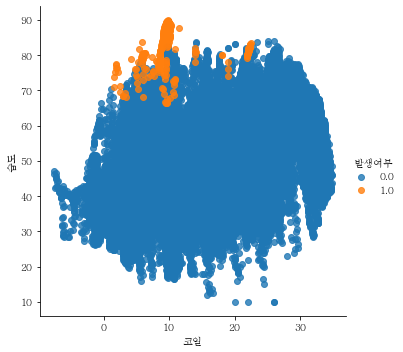

In [15]:
sns.lmplot(data = loc1, x = '코일' , y = '습도' , hue = '발생여부', fit_reg = False)

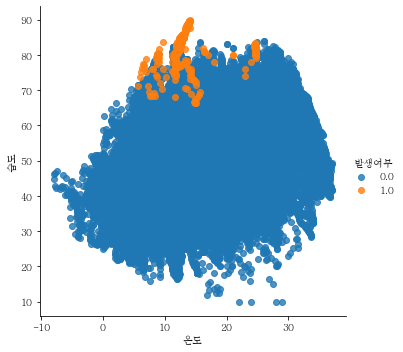

In [16]:
sns.lmplot(data = loc1, x = '온도' , y = '습도' , hue = '발생여부', fit_reg = False)

- 코일온도는 0-25도 사이일때, 내부온도는 5-25도 일때 결로가 발생하였다
- 습도는 65퍼센트 이상일 때에 결로가 발생함을 알 수 있다.

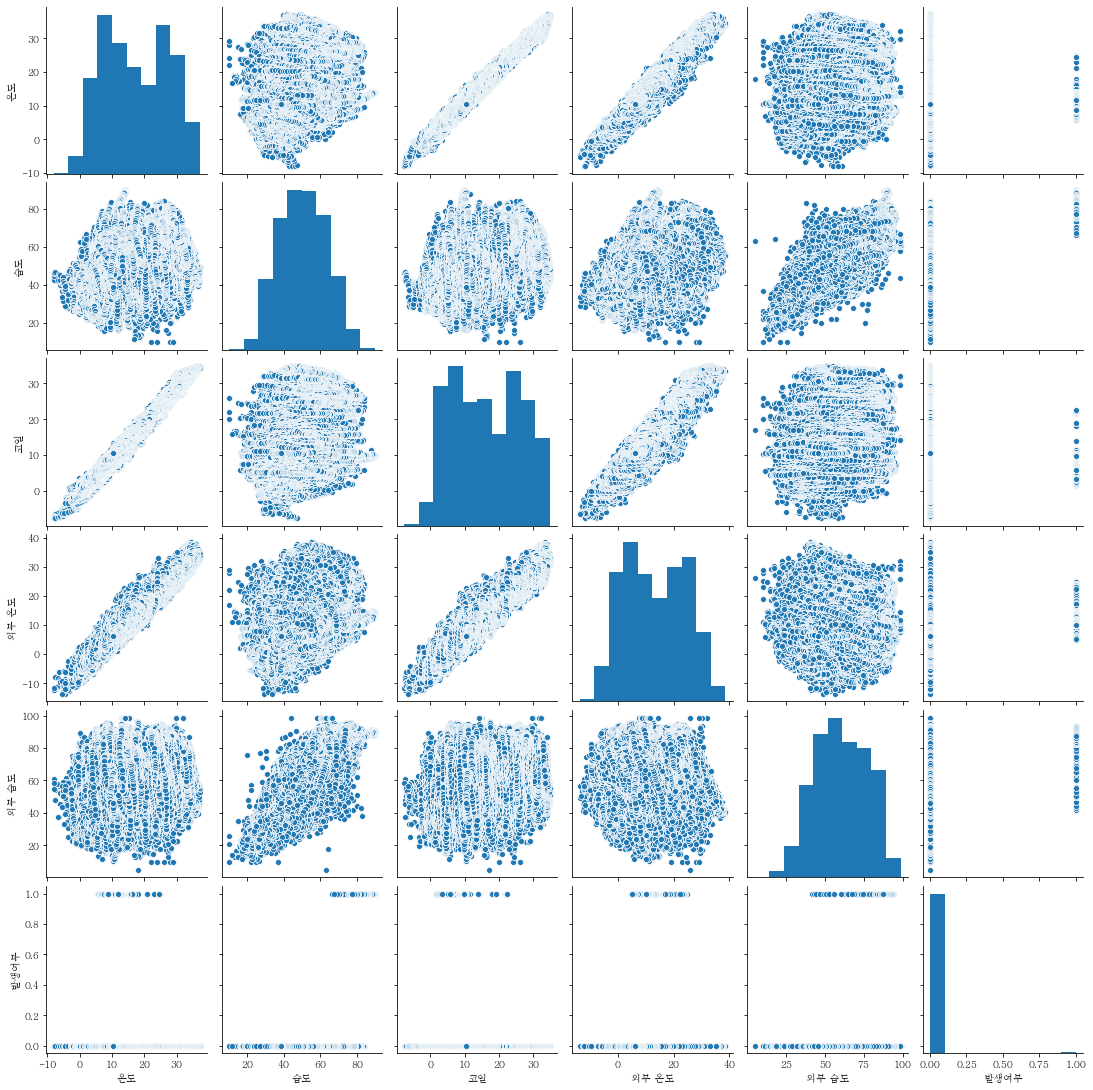

In [17]:
sns.pairplot(loc1[['온도', '습도', '코일', '외부 온도', '외부 습도','발생여부']])
plt.show()

> 위 pairplot을 통해 살펴보면 온도는 코일온도 및 외부온도와 연관성이 강하다는 것을 알 수있다.
> 이를 통해 내부 온도의 결측치를 정리함에 있어 외부온도를 참고 할 수 있다는 추론을 해볼 수 있다.

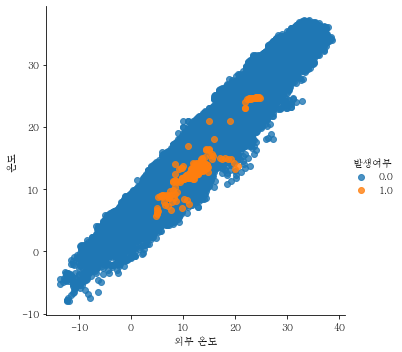

In [18]:
sns.lmplot(data = loc1, x = '외부 온도', y = '온도', hue = '발생여부', fit_reg = False)

- 날짜와 시간별로 그룹화 해주기 위해 날짜를 연,월,일,시,분 으로 나눠준다

In [19]:
loc1_split = loc1.copy()

In [20]:
loc1_split

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치
1,2016-04-01 0:00,16.00,24.00,11.00,9.00,42.00,0.0,1
2,2016-04-01 3:00,14.00,28.00,10.00,7.00,59.00,0.0,1
3,2016-04-01 6:00,13.00,33.00,10.00,6.00,56.00,0.0,1
4,2016-04-01 9:00,13.00,33.00,10.00,18.00,30.00,0.0,1
5,2016-04-01 12:00,16.00,28.00,10.00,18.00,20.00,0.0,1
...,...,...,...,...,...,...,...,...
58745,2019-03-31 23:10,10.52,36.39,10.52,6.40,43.86,0.0,1
58746,2019-03-31 23:20,10.52,37.09,10.44,6.34,44.02,0.0,1
58747,2019-03-31 23:30,10.43,37.18,10.56,6.40,43.04,0.0,1
58748,2019-03-31 23:40,10.49,38.00,10.56,6.31,45.33,0.0,1


#### 방법 1. to_datetime 사용하기

In [21]:
loc1['날짜'] = pd.to_datetime(loc1['날짜'])

C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
loc1["연도"] = loc1['날짜'].dt.year
loc1["월"] = loc1['날짜'].dt.month
loc1["일"] = loc1['날짜'].dt.day
loc1["시"] = loc1['날짜'].dt.hour
loc1["분"] = loc1['날짜'].dt.minute

C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [23]:
loc1

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분
1,2016-04-01 00:00:00,16.00,24.00,11.00,9.00,42.00,0.0,1,2016,4,1,0,0
2,2016-04-01 03:00:00,14.00,28.00,10.00,7.00,59.00,0.0,1,2016,4,1,3,0
3,2016-04-01 06:00:00,13.00,33.00,10.00,6.00,56.00,0.0,1,2016,4,1,6,0
4,2016-04-01 09:00:00,13.00,33.00,10.00,18.00,30.00,0.0,1,2016,4,1,9,0
5,2016-04-01 12:00:00,16.00,28.00,10.00,18.00,20.00,0.0,1,2016,4,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58745,2019-03-31 23:10:00,10.52,36.39,10.52,6.40,43.86,0.0,1,2019,3,31,23,10
58746,2019-03-31 23:20:00,10.52,37.09,10.44,6.34,44.02,0.0,1,2019,3,31,23,20
58747,2019-03-31 23:30:00,10.43,37.18,10.56,6.40,43.04,0.0,1,2019,3,31,23,30
58748,2019-03-31 23:40:00,10.49,38.00,10.56,6.31,45.33,0.0,1,2019,3,31,23,40


#### 방법 2.split 사용하기

In [24]:
plant1_train['날짜'].str.split('-').str[0]

1        2016
2        2016
3        2016
4        2016
5        2016
         ... 
58745    2019
58746    2019
58747    2019
58748    2019
58749    2019
Name: 날짜, Length: 58749, dtype: object

In [25]:
loc1_split

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치
1,2016-04-01 0:00,16.00,24.00,11.00,9.00,42.00,0.0,1
2,2016-04-01 3:00,14.00,28.00,10.00,7.00,59.00,0.0,1
3,2016-04-01 6:00,13.00,33.00,10.00,6.00,56.00,0.0,1
4,2016-04-01 9:00,13.00,33.00,10.00,18.00,30.00,0.0,1
5,2016-04-01 12:00,16.00,28.00,10.00,18.00,20.00,0.0,1
...,...,...,...,...,...,...,...,...
58745,2019-03-31 23:10,10.52,36.39,10.52,6.40,43.86,0.0,1
58746,2019-03-31 23:20,10.52,37.09,10.44,6.34,44.02,0.0,1
58747,2019-03-31 23:30,10.43,37.18,10.56,6.40,43.04,0.0,1
58748,2019-03-31 23:40,10.49,38.00,10.56,6.31,45.33,0.0,1


In [26]:
loc1_split['연도'] = plant1_train['날짜'].str.split('-').str[0]
loc1_split['월'] = plant1_train['날짜'].str.split('-').str[1]
loc1_split['일'] = plant1_train['날짜'].str.split('-').str[2].str.split(' ').str[0]
loc1_split['시'] = plant1_train['날짜'].str.split('-').str[2].str.split(' ').str[1].str.split(':').str[0]
loc1_split['분'] = plant1_train['날짜'].str.split('-').str[2].str.split(' ').str[1].str.split(':').str[1]

In [27]:
loc1_split

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분
1,2016-04-01 0:00,16.00,24.00,11.00,9.00,42.00,0.0,1,2016,04,01,0,00
2,2016-04-01 3:00,14.00,28.00,10.00,7.00,59.00,0.0,1,2016,04,01,3,00
3,2016-04-01 6:00,13.00,33.00,10.00,6.00,56.00,0.0,1,2016,04,01,6,00
4,2016-04-01 9:00,13.00,33.00,10.00,18.00,30.00,0.0,1,2016,04,01,9,00
5,2016-04-01 12:00,16.00,28.00,10.00,18.00,20.00,0.0,1,2016,04,01,12,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58745,2019-03-31 23:10,10.52,36.39,10.52,6.40,43.86,0.0,1,2019,03,31,23,10
58746,2019-03-31 23:20,10.52,37.09,10.44,6.34,44.02,0.0,1,2019,03,31,23,20
58747,2019-03-31 23:30,10.43,37.18,10.56,6.40,43.04,0.0,1,2019,03,31,23,30
58748,2019-03-31 23:40,10.49,38.00,10.56,6.31,45.33,0.0,1,2019,03,31,23,40


> 위와같이 두가지 방법으로 나눠주는것이 가능하다.

## 데이터 분배

> - 2016년 4월1일부터 2016년 12월 21일까지는 3시간 간격으로 체크하고
> - 그 이후로는 각각 1시간 , 30분, 10분 간격으로 체크한 데이터셋을 가지고 있다.
> - 3시간단위 데이터와 1시간 이하 단위 데이터의 주기를 통일해주거나 따로 처리할 필요성이 있다고 판단된다.
> - 우리는 이 데이터에서 3시간 단위 데이터와 1시간 단위 데이터로 나누어 학습시킬 예정이다.

In [28]:
loc1_3h = loc1[((loc1['연도'] <= 2016) & ( loc1['월'] <= 12))]
loc1_1h = loc1[((loc1['연도'] > 2016) & (loc1['분'] == 0))]

In [29]:
loc1_3h

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분
1,2016-04-01 00:00:00,16.0,24.0,11.0,9.00,42.00,0.0,1,2016,4,1,0,0
2,2016-04-01 03:00:00,14.0,28.0,10.0,7.00,59.00,0.0,1,2016,4,1,3,0
3,2016-04-01 06:00:00,13.0,33.0,10.0,6.00,56.00,0.0,1,2016,4,1,6,0
4,2016-04-01 09:00:00,13.0,33.0,10.0,18.00,30.00,0.0,1,2016,4,1,9,0
5,2016-04-01 12:00:00,16.0,28.0,10.0,18.00,20.00,0.0,1,2016,4,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,2016-12-31 19:00:00,NaN,NaN,NaN,4.26,74.24,NaN,1,2016,12,31,19,0
2247,2016-12-31 20:00:00,NaN,NaN,NaN,4.11,73.69,NaN,1,2016,12,31,20,0
2248,2016-12-31 21:00:00,NaN,NaN,NaN,2.49,78.97,NaN,1,2016,12,31,21,0
2249,2016-12-31 22:00:00,NaN,NaN,NaN,2.61,80.43,NaN,1,2016,12,31,22,0


In [30]:
loc1_1h

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분
2251,2017-01-01 00:00:00,NaN,NaN,NaN,2.09,83.73,NaN,1,2017,1,1,0,0
2252,2017-01-01 01:00:00,NaN,NaN,NaN,2.25,85.13,NaN,1,2017,1,1,1,0
2253,2017-01-01 02:00:00,NaN,NaN,NaN,2.16,86.05,NaN,1,2017,1,1,2,0
2254,2017-01-01 03:00:00,NaN,NaN,NaN,2.28,85.01,NaN,1,2017,1,1,3,0
2255,2017-01-01 04:00:00,NaN,NaN,NaN,1.88,85.84,NaN,1,2017,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58720,2019-03-31 19:00:00,11.22,34.77,10.75,7.13,42.34,0.0,1,2019,3,31,19,0
58726,2019-03-31 20:00:00,10.73,34.71,10.71,6.61,41.15,0.0,1,2019,3,31,20,0
58732,2019-03-31 21:00:00,10.64,35.74,10.63,6.61,41.70,0.0,1,2019,3,31,21,0
58738,2019-03-31 22:00:00,10.43,35.68,10.48,6.49,42.46,0.0,1,2019,3,31,22,0


- 위의 두 데이터를 전체적으로 확인해보기 위해 병합데이터를 생성해본다

In [31]:
cc_data = pd.concat([loc1_3h,loc1_1h],axis=0)

In [32]:
cc_data

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분
1,2016-04-01 00:00:00,16.00,24.00,11.00,9.00,42.00,0.0,1,2016,4,1,0,0
2,2016-04-01 03:00:00,14.00,28.00,10.00,7.00,59.00,0.0,1,2016,4,1,3,0
3,2016-04-01 06:00:00,13.00,33.00,10.00,6.00,56.00,0.0,1,2016,4,1,6,0
4,2016-04-01 09:00:00,13.00,33.00,10.00,18.00,30.00,0.0,1,2016,4,1,9,0
5,2016-04-01 12:00:00,16.00,28.00,10.00,18.00,20.00,0.0,1,2016,4,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58720,2019-03-31 19:00:00,11.22,34.77,10.75,7.13,42.34,0.0,1,2019,3,31,19,0
58726,2019-03-31 20:00:00,10.73,34.71,10.71,6.61,41.15,0.0,1,2019,3,31,20,0
58732,2019-03-31 21:00:00,10.64,35.74,10.63,6.61,41.70,0.0,1,2019,3,31,21,0
58738,2019-03-31 22:00:00,10.43,35.68,10.48,6.49,42.46,0.0,1,2019,3,31,22,0


In [33]:
19495+2250

21745

이므로 잘 병합되었다는 것을 알 수 있다.

> - 가정 : 여름이 장마철로 인해 습도가 높으므로 더 자주 결로가 생길 것이다.

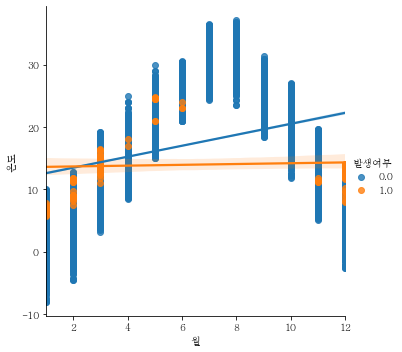

In [34]:
sns.lmplot(data = cc_data, x= '월', y = '온도', hue = '발생여부')

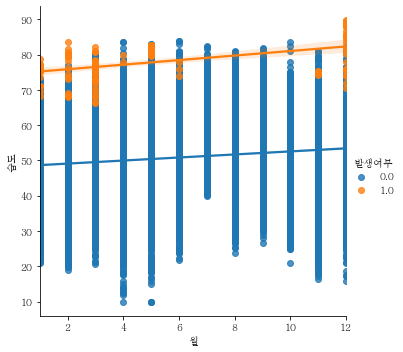

In [35]:
sns.lmplot(data = cc_data, x= '월', y = '습도', hue = '발생여부')

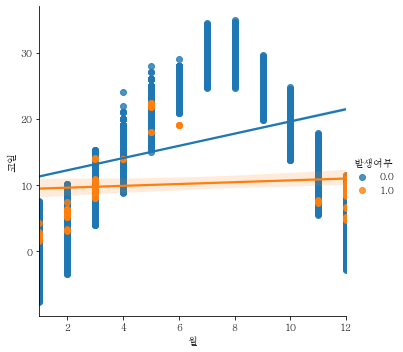

In [36]:
sns.lmplot(data = cc_data, x= '월', y = '코일', hue = '발생여부')

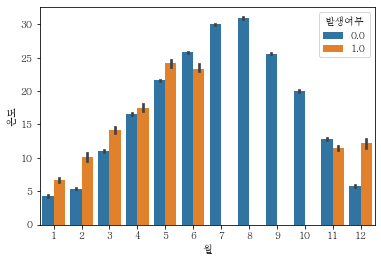

In [37]:
sns.barplot(x="월", y="온도", data=cc_data, hue = '발생여부')

> -  하지만 데이터를 살펴보면 여름철이 상대적으로 습도가 높지만 코일의 온도가 높고 기온 자체가 높아 이슬점을 충족하지 못하여
>    결로가 발생하지 않는 모습을 볼 수 있다.

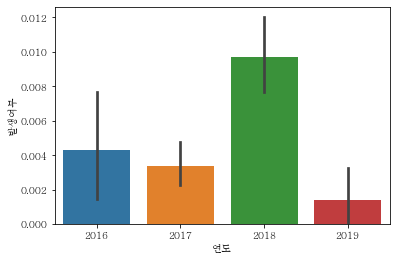

In [38]:
sns.barplot(data = cc_data, x= '연도', y = '발생여부')

> - 연도별 발생여부를 확인해 보면 2017년 보다 2018년에 더욱 자주 결로가 발생한 것을 확인할 수 있다.

In [39]:
asos_129 = pd.read_csv('./data/ASOS_129.csv')
aws_data = pd.read_csv('./data/AWS_D.csv')
dongne = pd.read_csv('./data/dongne_tm_hu.csv')

In [40]:
asos_129.shape,aws_data.shape,dongne.shape

((34991, 6), (69833, 5), (216272, 5))

In [41]:
aws_data

,지점,지점명,일시,기온(°C),습도(%)
0,616,당진,2016-04-01 1:00,5.9,43.8
1,616,당진,2016-04-01 2:00,5.5,45.5
2,616,당진,2016-04-01 3:00,5.2,52.1
3,616,당진,2016-04-01 4:00,4.7,47.1
4,616,당진,2016-04-01 5:00,5.5,43.7
...,...,...,...,...,...
69828,637,신평,2020-03-31 20:00,9.4,44.9
69829,637,신평,2020-03-31 21:00,8.7,56.1
69830,637,신평,2020-03-31 22:00,8.2,62.0
69831,637,신평,2020-03-31 23:00,7.5,67.7


In [42]:
aws_616 = aws_data[aws_data['지점'] == 616]

In [43]:
aws_616.shape

(34881, 5)

In [44]:
aws_616

,지점,지점명,일시,기온(°C),습도(%)
0,616,당진,2016-04-01 1:00,5.9,43.8
1,616,당진,2016-04-01 2:00,5.5,45.5
2,616,당진,2016-04-01 3:00,5.2,52.1
3,616,당진,2016-04-01 4:00,4.7,47.1
4,616,당진,2016-04-01 5:00,5.5,43.7
...,...,...,...,...,...
61049,616,당진,2020-03-31 20:00,8.5,52.3
61050,616,당진,2020-03-31 21:00,7.6,64.4
61051,616,당진,2020-03-31 22:00,6.9,71.5
61052,616,당진,2020-03-31 23:00,7.5,66.4


In [45]:
aws_637 = aws_data[aws_data['지점'] == 637]

In [46]:
aws_637.shape

(34952, 5)

In [47]:
aws_637

,지점,지점명,일시,기온(°C),습도(%)
8719,637,신평,2016-04-01 1:00,5.6,NaN
8720,637,신평,2016-04-01 2:00,5.1,NaN
8721,637,신평,2016-04-01 3:00,4.7,NaN
8722,637,신평,2016-04-01 4:00,3.7,NaN
8723,637,신평,2016-04-01 5:00,3.1,NaN
...,...,...,...,...,...
69828,637,신평,2020-03-31 20:00,9.4,44.9
69829,637,신평,2020-03-31 21:00,8.7,56.1
69830,637,신평,2020-03-31 22:00,8.2,62.0
69831,637,신평,2020-03-31 23:00,7.5,67.7


In [48]:
34881+34952

69833

In [49]:
dongne[:50]

,일,시,예보,기온,습도
0,1,200.0,4.0,20.700001,27.0
1,1,200.0,7.0,18.500000,27.0
2,1,200.0,10.0,13.200000,53.0
3,1,200.0,13.0,9.500000,76.0
4,1,200.0,16.0,7.100000,88.0
5,1,200.0,19.0,6.100000,88.0
6,1,200.0,22.0,12.900000,62.0
7,1,200.0,25.0,20.000000,42.0
8,1,200.0,28.0,20.700001,37.0
9,1,200.0,31.0,17.700001,41.0


In [50]:
asos_129 = asos_129[['일시','지점','지점명','기온(°C)','습도(%)','이슬점온도(°C)']]

In [51]:
asos_129

,일시,지점,지점명,기온(°C),습도(%),이슬점온도(°C)
0,2016-04-01 1:00,129,서산,9.2,34.0,-5.8
1,2016-04-01 2:00,129,서산,9.2,33.0,-6.2
2,2016-04-01 3:00,129,서산,7.5,40.0,-5.2
3,2016-04-01 4:00,129,서산,4.8,56.0,-3.2
4,2016-04-01 5:00,129,서산,3.6,61.0,-3.2
...,...,...,...,...,...,...
34986,2020-03-31 20:00,129,서산,8.1,53.0,-0.9
34987,2020-03-31 21:00,129,서산,7.4,59.0,-0.1
34988,2020-03-31 22:00,129,서산,7.4,58.0,-0.3
34989,2020-03-31 23:00,129,서산,7.5,60.0,0.2


In [52]:
def dewpoint(temp,humi):

    gamma = (17.62 * temp /(243.12+ temp)) + math.log(humi / 100.0)

    dewpoint = (243.12 * gamma) / (17.62 - gamma)
    
    return dewpoint


In [53]:
temp = asos_129['기온(°C)'][0]
humi = asos_129['습도(%)'][0]

In [54]:
dewpoint(temp,humi)

-5.875315266479505

- 일단 서산 데이터로 결측치 제거

In [55]:
asos_129['일시'] = pd.to_datetime(asos_129['일시'])

In [56]:
b = loc1.copy()

In [57]:
b.head()

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분
1,2016-04-01 00:00:00,16.0,24.0,11.0,9.0,42.0,0.0,1,2016,4,1,0,0
2,2016-04-01 03:00:00,14.0,28.0,10.0,7.0,59.0,0.0,1,2016,4,1,3,0
3,2016-04-01 06:00:00,13.0,33.0,10.0,6.0,56.0,0.0,1,2016,4,1,6,0
4,2016-04-01 09:00:00,13.0,33.0,10.0,18.0,30.0,0.0,1,2016,4,1,9,0
5,2016-04-01 12:00:00,16.0,28.0,10.0,18.0,20.0,0.0,1,2016,4,1,12,0


In [58]:
b.shape

(58749, 13)

In [59]:
b = b[b['분']==0]

In [60]:
b.shape

(21745, 13)

In [61]:
b[4045:4049]

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분
4046,2017-03-17 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,3,17,12,0
4047,2017-03-17 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,3,17,15,0
4048,2017-03-17 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,3,17,18,0
4049,2017-03-17 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1,2017,3,17,21,0


In [62]:
B_I_list = list(b[b['외부 온도'].isnull()].index)

In [63]:
print(B_I_list)

[769, 978, 979, 980, 1309, 2503, 4044, 4045, 4046, 4047, 4048, 4049, 4380, 4381, 4382, 4383, 4384, 4385, 4386, 4387, 4388, 4389, 4390, 4391, 4392, 4393, 4394, 4395, 4521, 4522, 4523, 4524, 4525, 4526, 4527, 4528, 4529, 4530, 4531, 4532, 4533, 4534, 4954, 4955, 4956, 4957, 4958, 4959, 4960, 4961, 4962, 4963, 4964, 4965, 4966, 4967, 4968, 4969, 4970, 4971, 4973, 8474, 8475, 8476, 8477, 10800, 10801, 13003, 41756, 41762]


In [64]:
for i in B_I_list:
    if b['날짜'][i] in list(asos_129['일시']):
        b['외부 온도'][i] = asos_129[asos_129['일시']==b['날짜'][i]]['기온(°C)']

C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
b[b['외부 온도'].isnull()]

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분


In [66]:
H_I_list = list(b[b['외부 습도'].isnull()].index)

In [67]:
print(H_I_list)

[769, 978, 979, 980, 1309, 2503, 4044, 4045, 4046, 4047, 4048, 4049, 4380, 4381, 4382, 4383, 4384, 4385, 4386, 4387, 4388, 4389, 4390, 4391, 4392, 4393, 4394, 4395, 4521, 4522, 4523, 4524, 4525, 4526, 4527, 4528, 4529, 4530, 4531, 4532, 4533, 4534, 4954, 4955, 4956, 4957, 4958, 4959, 4960, 4961, 4962, 4963, 4964, 4965, 4966, 4967, 4968, 4969, 4970, 4971, 4973, 8474, 8475, 8476, 8477, 10800, 10801, 13003, 41756, 41762]


In [68]:
for i in B_I_list:
    if b['날짜'][i] in list(asos_129['일시']):
        b['외부 습도'][i] = asos_129[asos_129['일시']==b['날짜'][i]]['습도(%)']

C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
b[b['외부 습도'].isnull()]

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분


In [70]:
b[4045:4049]

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분
4046,2017-03-17 12:00:00,NaN,NaN,NaN,12.4,34.0,NaN,1,2017,3,17,12,0
4047,2017-03-17 15:00:00,NaN,NaN,NaN,14.6,27.0,NaN,1,2017,3,17,15,0
4048,2017-03-17 18:00:00,NaN,NaN,NaN,10.4,35.0,NaN,1,2017,3,17,18,0
4049,2017-03-17 21:00:00,NaN,NaN,NaN,4.8,67.0,NaN,1,2017,3,17,21,0


In [71]:
test = loc1.copy()

In [72]:
a = test['외부 온도'] - test['온도']

In [73]:
a.describe()

count    57879.000000
mean        -3.941838
std          2.490255
min        -11.000000
25%         -5.560000
50%         -4.300000
75%         -2.690000
max          9.130000
dtype: float64

In [74]:
a_1 = test['외부 습도'] - test['습도']

In [75]:
a_1.describe()

count    57879.000000
mean         9.958954
std          9.824796
min        -58.000000
25%          4.270000
50%         10.470000
75%         16.460000
max         56.000000
dtype: float64

In [76]:
a_2 = test['온도'] - test['코일']
a_2.describe()

count    57879.000000
mean         1.072822
std          1.181019
min         -4.140000
25%          0.210000
50%          1.030000
75%          1.930000
max          6.000000
dtype: float64

In [77]:
IT_I_list = list(b[b['온도'].isnull()].index)

In [78]:
print(IT_I_list)

[769, 978, 979, 980, 1309, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2

In [79]:
for i in IT_I_list:
    b['온도'][i] = b['외부 온도'][i] + 4

C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
b[768:770]

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분
769,2016-07-06 00:00:00,25.30,NaN,NaN,21.30,97.00,NaN,1,2016,7,6,0,0
770,2016-07-06 03:00:00,25.26,72.19,25.93,21.32,85.29,0.0,1,2016,7,6,3,0


In [81]:
IH_I_list = list(b[b['습도'].isnull()].index)

In [82]:
print(IH_I_list)

[769, 978, 979, 980, 1309, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2

In [83]:
for i in IH_I_list:
    b['습도'][i] = b['외부 습도'][i] - 10

C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
b[b['습도'].isnull()]

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분


In [85]:
b[b['온도'].isnull()]

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분


In [86]:
b[b['코일'].isnull()]

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분
769,2016-07-06 00:00:00,25.3,87.0,NaN,21.3,97.0,NaN,1,2016,7,6,0,0
978,2016-08-01 03:00:00,27.9,90.0,NaN,23.9,100.0,NaN,1,2016,8,1,3,0
979,2016-08-01 06:00:00,27.8,90.0,NaN,23.8,100.0,NaN,1,2016,8,1,6,0
980,2016-08-01 09:00:00,30.2,90.0,NaN,26.2,100.0,NaN,1,2016,8,1,9,0
1309,2016-09-11 12:00:00,30.7,57.0,NaN,26.7,67.0,NaN,1,2016,9,11,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10800,2017-12-29 21:00:00,3.9,80.0,NaN,-0.1,90.0,NaN,1,2017,12,29,21,0
10801,2017-12-29 22:00:00,3.8,84.0,NaN,-0.2,94.0,NaN,1,2017,12,29,22,0
13003,2018-03-26 20:00:00,13.4,75.0,NaN,9.4,85.0,NaN,1,2018,3,26,20,0
41756,2018-12-03 00:00:00,15.0,65.0,NaN,11.0,75.0,NaN,1,2018,12,3,0,0


In [87]:
C_I_list = list(b[b['코일'].isnull()].index)

In [88]:
for i in C_I_list:
    b['코일'][i] = b['온도'][i] -2

C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
b[b['코일'].isnull()]

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분


dewpoint(temp,humi) -이슬점 구하는 공식

In [90]:
dew_list = []
for i in list(b.index):
    dew_list.append(dewpoint(b['온도'][i],b['습도'][i]))

In [91]:
b['이슬점'] = dew_list

In [92]:
b

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분,이슬점
1,2016-04-01 00:00:00,16.00,24.00,11.00,9.00,42.00,0.0,1,2016,4,1,0,0,-4.590890
2,2016-04-01 03:00:00,14.00,28.00,10.00,7.00,59.00,0.0,1,2016,4,1,3,0,-4.250964
3,2016-04-01 06:00:00,13.00,33.00,10.00,6.00,56.00,0.0,1,2016,4,1,6,0,-2.921590
4,2016-04-01 09:00:00,13.00,33.00,10.00,18.00,30.00,0.0,1,2016,4,1,9,0,-2.921590
5,2016-04-01 12:00:00,16.00,28.00,10.00,18.00,20.00,0.0,1,2016,4,1,12,0,-2.525769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58720,2019-03-31 19:00:00,11.22,34.77,10.75,7.13,42.34,0.0,1,2019,3,31,19,0,-3.791274
58726,2019-03-31 20:00:00,10.73,34.71,10.71,6.61,41.15,0.0,1,2019,3,31,20,0,-4.248198
58732,2019-03-31 21:00:00,10.64,35.74,10.63,6.61,41.70,0.0,1,2019,3,31,21,0,-3.938005
58738,2019-03-31 22:00:00,10.43,35.68,10.48,6.49,42.46,0.0,1,2019,3,31,22,0,-4.146980


In [93]:
b[b['발생여부'].isnull()]

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분,이슬점
769,2016-07-06 00:00:00,25.3,87.0,23.3,21.3,97.0,NaN,1,2016,7,6,0,0,22.977997
978,2016-08-01 03:00:00,27.9,90.0,25.9,23.9,100.0,NaN,1,2016,8,1,3,0,26.105396
979,2016-08-01 06:00:00,27.8,90.0,25.8,23.8,100.0,NaN,1,2016,8,1,6,0,26.006716
980,2016-08-01 09:00:00,30.2,90.0,28.2,26.2,100.0,NaN,1,2016,8,1,9,0,28.374910
1309,2016-09-11 12:00:00,30.7,57.0,28.7,26.7,67.0,NaN,1,2016,9,11,12,0,21.202677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10800,2017-12-29 21:00:00,3.9,80.0,1.9,-0.1,90.0,NaN,1,2017,12,29,21,0,0.761881
10801,2017-12-29 22:00:00,3.8,84.0,1.8,-0.2,94.0,NaN,1,2017,12,29,22,0,1.343179
13003,2018-03-26 20:00:00,13.4,75.0,11.4,9.4,85.0,NaN,1,2018,3,26,20,0,9.055790
41756,2018-12-03 00:00:00,15.0,65.0,13.0,11.0,75.0,NaN,1,2018,12,3,0,0,8.469506


In [94]:
occ_I_list = list(b[b['발생여부'].isnull()].index)

In [95]:
for i in occ_I_list:
    if b['코일'][i] <= b['이슬점'][i]:
        b['발생여부'][i] = 1.0
    else:
        b['발생여부'][i] = 0.0

C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
b[b['발생여부'].isnull()]

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분,이슬점


In [97]:
b[975:990]

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분,이슬점
976,2016-07-31 21:00:00,32.16,64.87,31.39,27.67,78.27,0.0,1,2016,7,31,21,0,24.711283
977,2016-08-01 00:00:00,31.21,67.40,31.24,26.03,86.32,0.0,1,2016,8,1,0,0,24.449816
978,2016-08-01 03:00:00,27.90,90.00,25.90,23.90,100.00,1.0,1,2016,8,1,3,0,26.105396
979,2016-08-01 06:00:00,27.80,90.00,25.80,23.80,100.00,1.0,1,2016,8,1,6,0,26.006716
980,2016-08-01 09:00:00,30.20,90.00,28.20,26.20,100.00,1.0,1,2016,8,1,9,0,28.374910
981,2016-08-01 12:00:00,30.67,68.25,30.70,28.53,73.78,0.0,1,2016,8,1,12,0,24.144887
982,2016-08-01 15:00:00,31.86,54.40,30.93,29.51,64.71,0.0,1,2016,8,1,15,0,21.517974
983,2016-08-01 18:00:00,32.44,56.23,31.05,28.53,67.40,0.0,1,2016,8,1,18,0,22.599347
984,2016-08-01 21:00:00,31.28,61.48,30.86,26.91,76.59,0.0,1,2016,8,1,21,0,22.987968
985,2016-08-02 00:00:00,30.67,66.73,30.97,26.48,81.47,0.0,1,2016,8,2,0,0,23.769854


In [98]:
b['코일'][978] <= b['이슬점'][978]

True

In [99]:
for i in list(b.index):
    if 6<=b['월'][i]<=8:
        b['발생여부'][i] = 0.0

C:\Users\jjw\Anaconda3\envs\painting\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
b[975:990]

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분,이슬점
976,2016-07-31 21:00:00,32.16,64.87,31.39,27.67,78.27,0.0,1,2016,7,31,21,0,24.711283
977,2016-08-01 00:00:00,31.21,67.40,31.24,26.03,86.32,0.0,1,2016,8,1,0,0,24.449816
978,2016-08-01 03:00:00,27.90,90.00,25.90,23.90,100.00,0.0,1,2016,8,1,3,0,26.105396
979,2016-08-01 06:00:00,27.80,90.00,25.80,23.80,100.00,0.0,1,2016,8,1,6,0,26.006716
980,2016-08-01 09:00:00,30.20,90.00,28.20,26.20,100.00,0.0,1,2016,8,1,9,0,28.374910
981,2016-08-01 12:00:00,30.67,68.25,30.70,28.53,73.78,0.0,1,2016,8,1,12,0,24.144887
982,2016-08-01 15:00:00,31.86,54.40,30.93,29.51,64.71,0.0,1,2016,8,1,15,0,21.517974
983,2016-08-01 18:00:00,32.44,56.23,31.05,28.53,67.40,0.0,1,2016,8,1,18,0,22.599347
984,2016-08-01 21:00:00,31.28,61.48,30.86,26.91,76.59,0.0,1,2016,8,1,21,0,22.987968
985,2016-08-02 00:00:00,30.67,66.73,30.97,26.48,81.47,0.0,1,2016,8,2,0,0,23.769854


In [101]:
b[b['발생여부']==1]

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분,이슬점
93,2016-04-12 12:00:00,18.00,78.00,14.00,16.00,42.00,1.0,1,2016,4,12,12,0,14.104310
121,2016-04-16 00:00:00,17.00,80.00,14.00,11.00,68.00,1.0,1,2016,4,16,0,0,13.522556
242,2016-05-01 03:00:00,21.00,80.00,18.00,15.00,44.00,1.0,1,2016,5,1,3,0,17.415521
258,2016-05-03 03:00:00,21.00,80.00,18.00,19.00,79.00,1.0,1,2016,5,3,3,0,17.415521
2089,2016-12-22 00:00:00,13.24,81.62,10.86,11.53,92.64,1.0,1,2016,12,22,0,0,10.161577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41924,2018-12-04 04:00:00,12.66,85.47,9.98,11.37,88.37,1.0,1,2018,12,4,4,0,10.284435
41930,2018-12-04 05:00:00,12.23,84.13,9.87,10.52,86.87,1.0,1,2018,12,4,5,0,9.626511
50626,2019-02-03 14:00:00,8.63,79.49,5.90,7.25,93.56,1.0,1,2019,2,3,14,0,5.279193
50632,2019-02-03 15:00:00,8.84,80.16,5.98,6.98,91.27,1.0,1,2019,2,3,15,0,5.604791


In [102]:
b

,날짜,온도,습도,코일,외부 온도,외부 습도,발생여부,센서위치,연도,월,일,시,분,이슬점
1,2016-04-01 00:00:00,16.00,24.00,11.00,9.00,42.00,0.0,1,2016,4,1,0,0,-4.590890
2,2016-04-01 03:00:00,14.00,28.00,10.00,7.00,59.00,0.0,1,2016,4,1,3,0,-4.250964
3,2016-04-01 06:00:00,13.00,33.00,10.00,6.00,56.00,0.0,1,2016,4,1,6,0,-2.921590
4,2016-04-01 09:00:00,13.00,33.00,10.00,18.00,30.00,0.0,1,2016,4,1,9,0,-2.921590
5,2016-04-01 12:00:00,16.00,28.00,10.00,18.00,20.00,0.0,1,2016,4,1,12,0,-2.525769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58720,2019-03-31 19:00:00,11.22,34.77,10.75,7.13,42.34,0.0,1,2019,3,31,19,0,-3.791274
58726,2019-03-31 20:00:00,10.73,34.71,10.71,6.61,41.15,0.0,1,2019,3,31,20,0,-4.248198
58732,2019-03-31 21:00:00,10.64,35.74,10.63,6.61,41.70,0.0,1,2019,3,31,21,0,-3.938005
58738,2019-03-31 22:00:00,10.43,35.68,10.48,6.49,42.46,0.0,1,2019,3,31,22,0,-4.146980


> 전체적으로 보았을때 결로가 생기기 위해서는 코일의 표면온도가 이슬점과 유사하거나 습도가 일정이상이 되면 결로가 발생한다고 생각할 수 있다.

>상대 습도가 높다는 것은 이슬점이 현재 공기 온도에 가깝다는 것을 의미한다. 상대 습도가 100%이면 이슬점이 현재 온도와 동일하며 공기가 최대로 물에 포화됨을 나타낸다. 수분 함량이 일정하게 유지되고 온도가 증가하면 상대 습도는 감소하지만 이슬점은 일정하게 유지된다[7].


>기압이 증가하면 이슬점이 증가한다[8]. 즉, 압력이 증가할 경우 동일한 이슬점을 유지하기 위해 공기 중 수증기 질량을 줄여야 한다. 예를 들어, 뉴욕(33피트 또는 10미터 높이)과 덴버(5,280피트 또는 1,610미터 높이[9])를 생각해 보자. 덴버는 뉴욕보다 높은 고도에 있기 때문에 기압이 더 낮은 경향이 있을 것이다. 이는 두 도시의 이슬점과 온도가 같으면 덴버에서 공기 중 수증기의 양이 더 많아 진다는 것을 의미한다.